In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA


'Crowdfunding is the practice of funding a project or venture by raising small amounts of money from a large number of people, typically via the Internet.'[1] I was interested in launching my own kickstarter project a couple of years ago but I managed to find another way of funding my idea. However, my interested in the crowdfunding practice remained and I wanted to see if my project would have been successful if I released in the first place. So, I was trying to find data based on different projects and their successsful rate and characteristics and I managed to find such data in the website called Kaggle.

In [2]:
df1 = pd.read_csv('ks-projects-201801.csv')
df1.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


Exploring the variables

In [3]:
#Creating a new column including the launched date but without the timestamp so it can be easily compared to the deadline date
df1['Launched_updated'] = df1['launched'].str[0:11]
df1['year_month'] =  df1['Launched_updated'].str[:7]


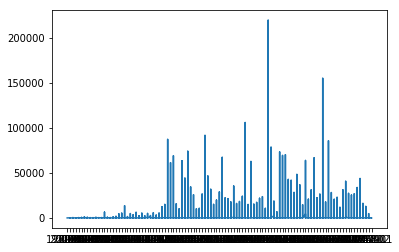

In [4]:
result2 = df1.sort_values('year_month', ascending=True).reset_index()
plt.plot(result2['year_month'], result2['backers'])
plt.show()


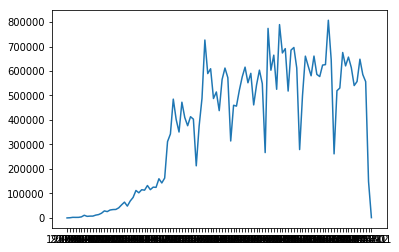

In [5]:
result = df1.groupby('year_month', as_index=False).sum()
plt.plot(result['year_month'], result['backers'])
plt.show()

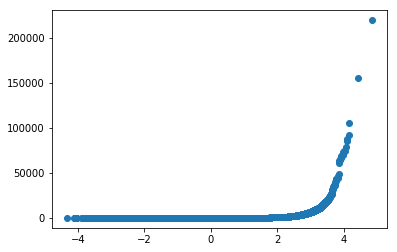

In [6]:
norm= np.random.normal(0, 1, 378661)
norm.sort()
plt.plot(norm, df1['backers'].sort_values(), "o") 
plt.show() 

In [7]:
df2 = df1[:100]

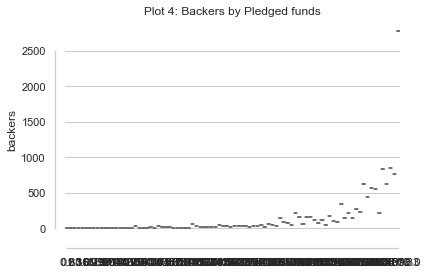

In [8]:
sns.set(style="whitegrid")
ax = sns.boxplot(x='usd_pledged_real',y='backers',data=df2,palette='pastel')  
plt.title('Plot 4: Backers by Pledged funds')
sns.despine(offset=10, trim=True)
ax.set(xlabel='', ylabel='backers')
plt.show()

Feature engineering

In [9]:
# Creating a new column consisting of the calculated difference in days between the launched date and the deadline date so we can draw 
# some conclusions based on that difference. 
df1['deadline'] = pd.to_datetime(df1['deadline'])
df1['Launched_updated'] = pd.to_datetime(df1['Launched_updated'])
df1['Date_difference'] = df1['deadline'] - df1['Launched_updated']

In [10]:
df1 = df1.dropna()

In [11]:
df1 = df1[df1["state"].isin(["failed", "successful"])]

In [12]:
df1["launched_month"]   = df1["Launched_updated"].dt.month
df1["launched_week"]    = df1["Launched_updated"].dt.week
df1["launched_day"]     = df1["Launched_updated"].dt.weekday

In [13]:
df1["is_weekend"] = df1["launched_day"].apply(lambda x: 1 if x > 4 else 0)

In [14]:
df1["num_words"]        = df1["name"].apply(lambda x: len(x.split()))

In [15]:
df1["num_chars"]        = df1["name"].apply(lambda x: len(x.replace(" ","")))

In [16]:
data = df1[['Date_difference', 'launched_month', 'is_weekend']]

In [17]:
df1.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real', 'Launched_updated',
       'year_month', 'Date_difference', 'launched_month', 'launched_week',
       'launched_day', 'is_weekend', 'num_words', 'num_chars'],
      dtype='object')

In [18]:
df1.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,...,usd_goal_real,Launched_updated,year_month,Date_difference,launched_month,launched_week,launched_day,is_weekend,num_words,num_chars
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,...,1533.95,2015-08-11,2015-08,59 days,8,33,1,0,6,26
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,...,30000.00,2017-09-02,2017-09,60 days,9,35,5,1,8,38
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,...,45000.00,2013-01-12,2013-01,45 days,1,2,5,1,3,12
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,...,5000.00,2012-03-17,2012-03,30 days,3,11,5,1,7,43
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,...,50000.00,2016-02-26,2016-02,35 days,2,8,4,0,3,18


In [19]:
df1_feat = df1[['pledged', 'usd_goal_real', 'Date_difference', 'launched_month', 'launched_week']]

In [20]:
df1_feat.dtypes

pledged                    float64
usd_goal_real              float64
Date_difference    timedelta64[ns]
launched_month               int64
launched_week                int64
dtype: object

In [21]:
df1_feat['Date_difference'] = df1_feat['Date_difference'].apply(lambda x: int(str(x).replace('days', '').replace("00:00:00","")))

c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=5,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(df1_feat, df1['state'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1337, splitter='best')

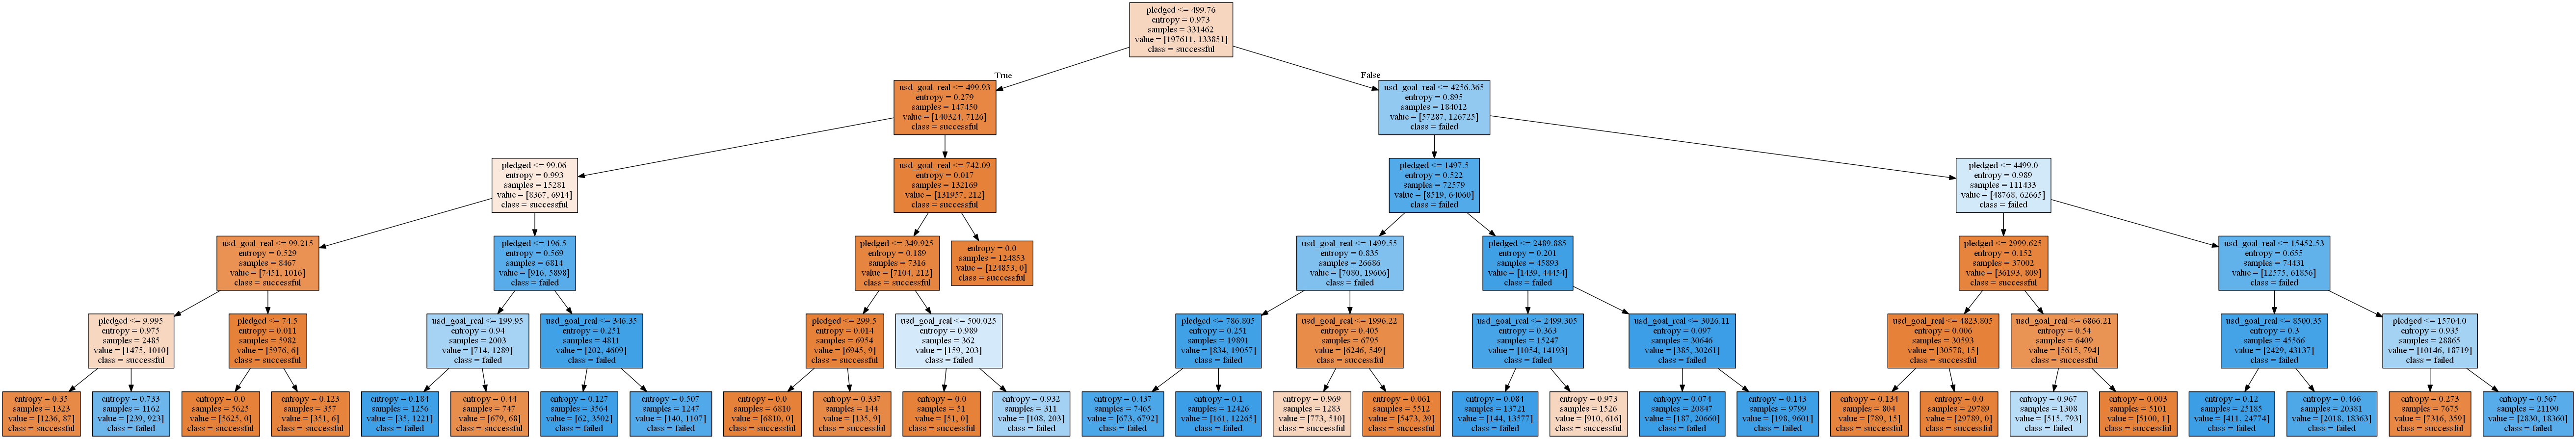

In [23]:
from sklearn import tree
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df1_feat.columns,
    class_names=['successful', 'failed'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [24]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df1_feat
Y = df1['state']


cross_val_score(rfc, X, Y, cv=5)

c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 

array([0.9890337 , 0.9895915 , 0.98882218, 0.98909371, 0.98895794])